* Add wind speed, 

* M-O approaches to latent heat flux, 
* Find downvalley potential temp, noting elevation of each

In [60]:
import os
import act
import glob
import xarray as xr

import sys
sys.path.append('/home/elilouis/sublimationofsnow')
import sosutils
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import altair as alt
import pytz
import datetime
import metpy
from metpy.units import units
alt.data_transformers.disable_max_rows()
import numpy as np

# User Inputs

In [61]:
# datelist = ['20221031', '20221101', '20221102']
datelist = ['20221217', '20221218', '20221219', '20221220']

## SOS

In [62]:
sos_download_dir='/data2/elilouis/sublimationofsnow/sosnoqc'
DATE_FORMAT_STR = '%Y%m%d'
start_date = datelist[0]
end_date = datelist[-1]

### Define variable list to extract

In [63]:
VARIABLE_NAMES = [  
    'spd_1m_c',     'dir_1m_c',     'u_1m_c',   'v_1m_c',   'w_1m_c',   'u_w__1m_c',    'v_w__1m_c',  'u_tc__1m_c',  'v_tc__1m_c',   'u_h2o__1m_c',  'v_h2o__1m_c',   'w_tc__1m_c',   'w_h2o__1m_c',
    'spd_2m_c',     'dir_2m_c',     'u_2m_c',   'v_2m_c',   'w_2m_c',   'u_w__2m_c',    'v_w__2m_c',  'u_tc__2m_c',  'v_tc__2m_c',   'u_h2o__2m_c',  'v_h2o__2m_c',   'w_tc__2m_c',   'w_h2o__2m_c',
    'spd_3m_c',     'dir_3m_c',     'u_3m_c',   'v_3m_c',   'w_3m_c',   'u_w__3m_c',    'v_w__3m_c',  'u_tc__3m_c',  'v_tc__3m_c',   'u_h2o__3m_c',  'v_h2o__3m_c',   'w_tc__3m_c',   'w_h2o__3m_c',
    'spd_5m_c',     'dir_5m_c',     'u_5m_c',   'v_5m_c',   'w_5m_c',   'u_w__5m_c',    'v_w__5m_c',  'u_tc__5m_c',  'v_tc__5m_c',   'u_h2o__5m_c',  'v_h2o__5m_c',   'w_tc__5m_c',   'w_h2o__5m_c',
    'spd_10m_c',    'dir_10m_c',    'u_10m_c',  'v_10m_c',  'w_10m_c',  'u_w__10m_c',   'v_w__10m_c', 'u_tc__10m_c', 'v_tc__10m_c',  'u_h2o__10m_c', 'v_h2o__10m_c',  'w_tc__10m_c',  'w_h2o__10m_c',
    'spd_15m_c',    'dir_15m_c',    'u_15m_c',  'v_15m_c',  'w_15m_c',  'u_w__15m_c',   'v_w__15m_c', 'u_tc__15m_c', 'v_tc__15m_c',  'u_h2o__15m_c', 'v_h2o__15m_c',  'w_tc__15m_c',  'w_h2o__15m_c',
    'spd_20m_c',    'dir_20m_c',    'u_20m_c',  'v_20m_c',  'w_20m_c',  'u_w__20m_c',   'v_w__20m_c', 'u_tc__20m_c', 'v_tc__20m_c',  'u_h2o__20m_c', 'v_h2o__20m_c',  'w_tc__20m_c',  'w_h2o__20m_c',
    
    'tc_1m_c', 'tc_2m_c', 'tc_3m_c', 'tc_5m_c', 'tc_10m_c', 'tc_15m_c', 'tc_20m_c',

    'T_1m_c', 'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c',
    'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c',
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c',
    'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c',

    'P_20m_c',
    'P_10m_c', 'P_10m_d', 'P_10m_uw', 'P_10m_ue',

    'RH_1m_c', 'RH_2m_c', 'RH_3m_c', 'RH_4m_c', 'RH_5m_c', 'RH_6m_c', 'RH_7m_c', 'RH_8m_c', 'RH_9m_c', 'RH_10m_c',
    'RH_11m_c','RH_12m_c','RH_13m_c','RH_14m_c','RH_15m_c','RH_16m_c','RH_17m_c','RH_18m_c','RH_19m_c','RH_20m_c',

    'SF_avg_1m_ue', 'SF_avg_2m_ue'
]

## SAIL - ECOR

In [64]:
ecor_gothic = 'guc30ecorM1.b1'
ecor_kp = 'guc30ecorS3.b1'
met_gothic = 'gucmetM1.b1'
met_kp = 'gucmetS3.b1'

start_date = datelist[0]
end_date = datelist[-1]

output_dir = '/data2/elilouis/sublimationofsnow/'
ecor_gothic_path = os.path.join(output_dir, ecor_gothic)
ecor_kp_path = os.path.join(output_dir, ecor_kp)
met_gothic_path = os.path.join(output_dir, met_gothic)
met_kp_path = os.path.join(output_dir, met_kp)

In [65]:
username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")

## SPLASH - ASFS

In [66]:
splash_file_dir = '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/'
all_splash_files = os.listdir(splash_file_dir)
len(all_splash_files)
daily_splash_files = []
for date in datelist:
    daily_splash_files = daily_splash_files + [f for f in all_splash_files if date in f]
len(daily_splash_files)

13

In [67]:
averypicnic_slowsled_files = [os.path.join(splash_file_dir, f) for f in daily_splash_files if 'slowsled' in f and 'picnic' in f]
averypicnic_turbsled_files = [os.path.join(splash_file_dir, f) for f in daily_splash_files if 'turbsled' in f and 'picnic' in f]
ponds_slowsled_files = [os.path.join(splash_file_dir, f) for f in daily_splash_files if 'slowsled' in f and 'pond' in f]
ponds_turbsled_files = [os.path.join(splash_file_dir, f) for f in daily_splash_files if 'turbsled' in f and 'pond' in f]

In [68]:
averypicnic_slowsled_files, averypicnic_turbsled_files, ponds_slowsled_files, ponds_turbsled_files

(['/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs50-picnic.20221217.000000.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs50-picnic.20221218.000000.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs50-picnic.20221219.000000.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs50-picnic.20221220.000000.nc'],
 ['/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/turbsled.level1.asfs50-picnic.20221217.000000.10min.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/turbsled.level1.asfs50-picnic.20221218.000000.10min.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/turbsled.level1.asfs50-picnic.20221219.000000.10min.nc',
  '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/turbsled.level1.asfs50-picnic.20221220.000000.10min.nc'],
 ['/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled

In [69]:
averypicnic_slowsled_xr = xr.open_mfdataset(averypicnic_slowsled_files)
averypicnic_turbsled_xr = xr.open_mfdataset(averypicnic_turbsled_files)

In [70]:
ponds_slowsled_files

['/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs30-pond.20221217.000000.nc',
 '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs30-pond.20221218.000000.nc',
 '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs30-pond.20221219.000000.nc',
 '/data2/elilouis/sublimationofsnow/splash_for_eli_late_2022/slowsled.level1.asfs30-pond.20221220.000000.nc']

In [71]:
# fails for some reason
pond_slowsled_xr = xr.open_mfdataset(ponds_slowsled_files[:3])
# No turbulence data at KPS data for these days???
# pond_turbsled_xr = xr.open_mfdataset(ponds_turbsled_files)

## Snotel (Schofield)

In [72]:
from metloom.pointdata import SnotelPointData

In [73]:
snotel_point = SnotelPointData("737:CO:SNTL", "Schofield")

# Data Download

## SOS

In [74]:
example_dataset = xr.open_dataset(sosutils.download_sos_data_day(datelist[0], sos_download_dir))

In [75]:
datasets = [xr.open_dataset(sosutils.download_sos_data_day(date, sos_download_dir))[VARIABLE_NAMES] for date in datelist]

sos_ds = sosutils.merge_datasets_with_different_variables(datasets, dim='time')
sos_df = sos_ds.to_dataframe().reset_index()

## ECOR

In [76]:
from tempfile import TemporaryDirectory
with TemporaryDirectory() as temp_dir:
    act.discovery.download_data(
        username,    token,    ecor_gothic,    start_date,    end_date,
        output = temp_dir
    )
    ecor_gothic_ds = act.io.armfiles.read_netcdf(glob.glob(os.path.join(temp_dir, '*.cdf')))

with TemporaryDirectory() as temp_dir:
    act.discovery.download_data(
        username,    token,    ecor_kp,    start_date,    end_date,
        output = temp_dir
    )
    ecor_kps_ds = act.io.armfiles.read_netcdf(glob.glob(os.path.join(temp_dir, '*.cdf')))

with TemporaryDirectory() as temp_dir:
    act.discovery.download_data(
        username,    token,    met_gothic,    start_date,    end_date,
        output = temp_dir
    )
    met_gothic_ds = act.io.armfiles.read_netcdf(glob.glob(os.path.join(temp_dir, '*.cdf')))

[DOWNLOADING] guc30ecorM1.b1.20221217.000000.cdf
[DOWNLOADING] guc30ecorM1.b1.20221218.000000.cdf
[DOWNLOADING] guc30ecorM1.b1.20221219.000000.cdf
[DOWNLOADING] guc30ecorM1.b1.20221220.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20221217.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20221218.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20221219.000000.cdf
[DOWNLOADING] guc30ecorS3.b1.20221220.000000.cdf
[DOWNLOADING] gucmetM1.b1.20221217.000000.cdf
[DOWNLOADING] gucmetM1.b1.20221218.000000.cdf
[DOWNLOADING] gucmetM1.b1.20221219.000000.cdf
[DOWNLOADING] gucmetM1.b1.20221220.000000.cdf


## SNOTEL

In [77]:
snotel_df = snotel_point.get_hourly_data(
    datetime.datetime.strptime(datelist[0], DATE_FORMAT_STR) - datetime.timedelta(days=1),
    datetime.datetime.strptime(datelist[-1], DATE_FORMAT_STR) + datetime.timedelta(days=1),
    [
        snotel_point.ALLOWED_VARIABLES.SWE,
        snotel_point.ALLOWED_VARIABLES.RH,
        snotel_point.ALLOWED_VARIABLES.TEMP,
    ]
)

In [78]:
snotel_df.head()

geometry  \
datetime                  site                                                     
2022-12-16 08:00:00+00:00 737:CO:SNTL  POINT Z (-107.04933 39.01467 10653.00000)   
2022-12-16 09:00:00+00:00 737:CO:SNTL  POINT Z (-107.04933 39.01467 10653.00000)   
2022-12-16 10:00:00+00:00 737:CO:SNTL  POINT Z (-107.04933 39.01467 10653.00000)   
2022-12-16 11:00:00+00:00 737:CO:SNTL  POINT Z (-107.04933 39.01467 10653.00000)   
2022-12-16 12:00:00+00:00 737:CO:SNTL  POINT Z (-107.04933 39.01467 10653.00000)   

                                        SWE SWE_units  RELATIVE HUMIDITY  \
datetime                  site                                             
2022-12-16 08:00:00+00:00 737:CO:SNTL  11.0        in               84.0   
2022-12-16 09:00:00+00:00 737:CO:SNTL  10.9        in               82.0   
2022-12-16 10:00:00+00:00 737:CO:SNTL  10.9        in               82.0   
2022-12-16 11:00:00+00:00 737:CO:SNTL  10.9        in               23.0   
2022-12-16 12:00:00+00:00 737:CO:SNTL  10.9        in               80.0   

                                      RELATIVE HUMIDITY_units  AIR TEMP  \
datetime                  site                                            
2022-12-16 08:00:00+00:00 737:CO:SNTL                     pct     -1.66   
2022-12-16 09:00:00+00:00 737:CO:SNTL                     pct     -2.02   
2022-12-16 10:00:00+00:00 737:CO:SNTL                     pct     -2.92   
2022-12-16 11:00:00+00:00 737:CO:SNTL                     pct     -3.28   
2022-12-16 12:00:00+00:00 737:CO:SNTL                     pct     -4.18   

                                      AIR TEMP_units datasource  
datetime                  site                                   
2022-12-16 08:00:00+00:00 737:CO:SNTL           degF       NRCS  
2022-12-16 09:00:00+00:00 737:CO:SNTL           degF       NRCS  
2022-12-16 10:00:00+00:00 737:CO:SNTL           degF       NRCS  
2022-12-16 11:00:00+00:00 737:CO:SNTL           degF       NRCS  
2022-12-16 12:00:00+00:00 737:CO:SNTL           degF       NRCS

# Calculations

## Potential temperatures

In [79]:
import pint_xarray

In [80]:
# SAIL gothic met tower
met_gothic_ds['potential temperature'] \
                        = metpy.calc.potential_temperature(met_gothic_ds['atmos_pressure'] * units.kPa, met_gothic_ds['temp_mean'] * units.celsius).pint.to(units.celsius)

# SOS towers
for i in range(1,21):
    height_adj_pressure = metpy.calc.add_height_to_pressure(
        sos_ds['P_10m_c'] * units.millibar, 
        i*units.m - (10*units.m)
    )
    sos_ds[f'Tpot_{i}m_c'] = metpy.calc.potential_temperature(    
        height_adj_pressure,
        sos_ds[f'T_{i}m_c'] * units.celsius
    ).pint.to(units.celsius)


### Calculate for schofield using KPS /SOS reference pressures

In [81]:
import py3dep
kettle_ponds = [-106.973006, 38.942005]
kps_elevation = py3dep.elevation_bycoords([kettle_ponds])[0] * units.meters
schofield_elevation = (snotel_df.geometry.iloc[0].coords[-1][-1] * units.feet).to(units.meters)
# calculate difference in elevation between the KPS site and Schofield Pass Snotel Site
schofield_gothic_elev_diff = schofield_elevation - kps_elevation

In [82]:
# calculate hourly average pressure values at KPS
sos_kps_10m_p_hourly = sos_ds.to_dataframe()['P_10m_c'].resample("60Min").mean()
# convert KPS hourly average pressure values to pressures at the Schofield Pass Snotel Site
snotel_df['pressure'] = snotel_df.index.get_level_values(0).to_series().apply(
    lambda dt: metpy.calc.add_height_to_pressure(
        sos_kps_10m_p_hourly[dt] * units.millibar, 
        schofield_gothic_elev_diff - (10*units.m)
    ) if dt in sos_kps_10m_p_hourly.index else np.nan * units.millibar
).values

snotel_df['AIR TEMP'] = snotel_df['AIR TEMP'].apply(lambda x: x * units.fahrenheit).values


snotel_df['potential temperature'] = snotel_df.apply(
    lambda row: metpy.calc.potential_temperature(row['pressure'], row['AIR TEMP']).to(units.celsius),
    axis=1
)

/tmp/ipykernel_391926/661223516.py:8: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  ) if dt in sos_kps_10m_p_hourly.index else np.nan * units.millibar
/tmp/ipykernel_391926/661223516.py:6: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  sos_kps_10m_p_hourly[dt] * units.millibar,


## Sublimation/evaporation

In [83]:
ecor_kps_ds['sublimation rate (mm/hr)'] = 3600*ecor_kps_ds['lv_e']/2.838e6
ecor_gothic_ds['sublimation rate (mm/hr)'] = 3600*ecor_gothic_ds['lv_e']/2.838e6
sos_ds['sublimation rate (mm/hr)'] = 3600*sos_ds['w_h2o__3m_c']/1e3
sos_ds['lv_e'] = (sos_ds['w_h2o__3m_c']/1e3)*2.838e6

## Modify SPLASH wind direction to be "direction wind blows from" instead of "direction wind blows towards"

In [84]:
import numpy as np

In [85]:
averypicnic_slowsled_xr['wdir_vec_mean'].values = np.array([
    (x-180) if (x-180) > 0 else 360+(x-180) for x in averypicnic_slowsled_xr['wdir_vec_mean'].values
])
# let wind dir go up to 390 degrees to plot better
averypicnic_slowsled_xr['wdir_vec_mean'].values = np.array([
    (x+360) if x < 30 else x for x in averypicnic_slowsled_xr['wdir_vec_mean'].values
])

# Plot

## Get nighttime df

In [86]:
import matplotlib.dates as mdates
from matplotlib import dates

night_df = sosutils.get_nightime_df(
    'US/Mountain', 
    ecor_gothic_ds['lat'].values[0], 
    ecor_gothic_ds['lon'].values[0],
    [datetime.datetime.strptime(date_str, '%Y%m%d') for date_str in ecor_gothic_ds.attrs['_file_dates']]
)

## Wind dir, pot. temps, and moisture fluxes at Gothic and KPS sites

#### Resample data for plotting and get a local time dimension

In [87]:
met_gothic_ds_5min = sosutils.fast_xarray_resample_median(met_gothic_ds.drop_dims("bound"), '5Min')
averypicnic_slowsled_xr_5min = sosutils.fast_xarray_resample_median(averypicnic_slowsled_xr, '5Min')
pond_slowsled_xr_5min = sosutils.fast_xarray_resample_median(pond_slowsled_xr, '5Min')

/home/elilouis/sublimationofsnow/sosutils.py:588: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_h = ds.to_dataframe().resample(resampling_time).median()  # what we want (quickly), but in Pandas form
/home/elilouis/sublimationofsnow/sosutils.py:588: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_h = ds.to_dataframe().resample(resampling_time).median()  # what we want (quickly), but in Pandas form
/home/elilouis/sublimationofsnow/sosutils.py:588: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either s

In [88]:
# get local_time zones
sos_ds = sosutils.modify_xarray_timezone(sos_ds, pytz.UTC, pytz.timezone('US/Mountain'))
ecor_kps_ds = sosutils.modify_xarray_timezone(ecor_kps_ds, pytz.UTC, pytz.timezone('US/Mountain'))
ecor_gothic_ds = sosutils.modify_xarray_timezone(ecor_gothic_ds, pytz.UTC, pytz.timezone('US/Mountain'))
met_gothic_ds = sosutils.modify_xarray_timezone(met_gothic_ds, pytz.UTC, pytz.timezone('US/Mountain'))
met_gothic_ds_5min = sosutils.modify_xarray_timezone(met_gothic_ds_5min, pytz.UTC, pytz.timezone('US/Mountain'))
averypicnic_slowsled_xr = sosutils.modify_xarray_timezone(averypicnic_slowsled_xr, pytz.UTC, pytz.timezone('US/Mountain'))
averypicnic_slowsled_xr_5min = sosutils.modify_xarray_timezone(averypicnic_slowsled_xr_5min, pytz.UTC, pytz.timezone('US/Mountain'))
pond_slowsled_xr = sosutils.modify_xarray_timezone(pond_slowsled_xr, pytz.UTC, pytz.timezone('US/Mountain'))
pond_slowsled_xr_5min = sosutils.modify_xarray_timezone(pond_slowsled_xr_5min, pytz.UTC, pytz.timezone('US/Mountain'))

In [89]:
snotel_df = snotel_df.reset_index().set_index('datetime').tz_convert('US/Mountain').tz_localize(None)

In [90]:
import seaborn as sns

In [91]:
met_gothic_ds_5min_df = met_gothic_ds_5min['wdir_vec_mean'].to_dataframe().reset_index()
met_gothic_ds_5min_df['hour'] = met_gothic_ds_5min_df['time'].dt.hour
met_gothic_ds_5min_df_night = pd.concat([met_gothic_ds_5min_df.query("hour < 7"), met_gothic_ds_5min_df.query("hour > 18")])
met_gothic_ds_5min_df_day = met_gothic_ds_5min_df.query("hour > 7").query("hour < 18")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


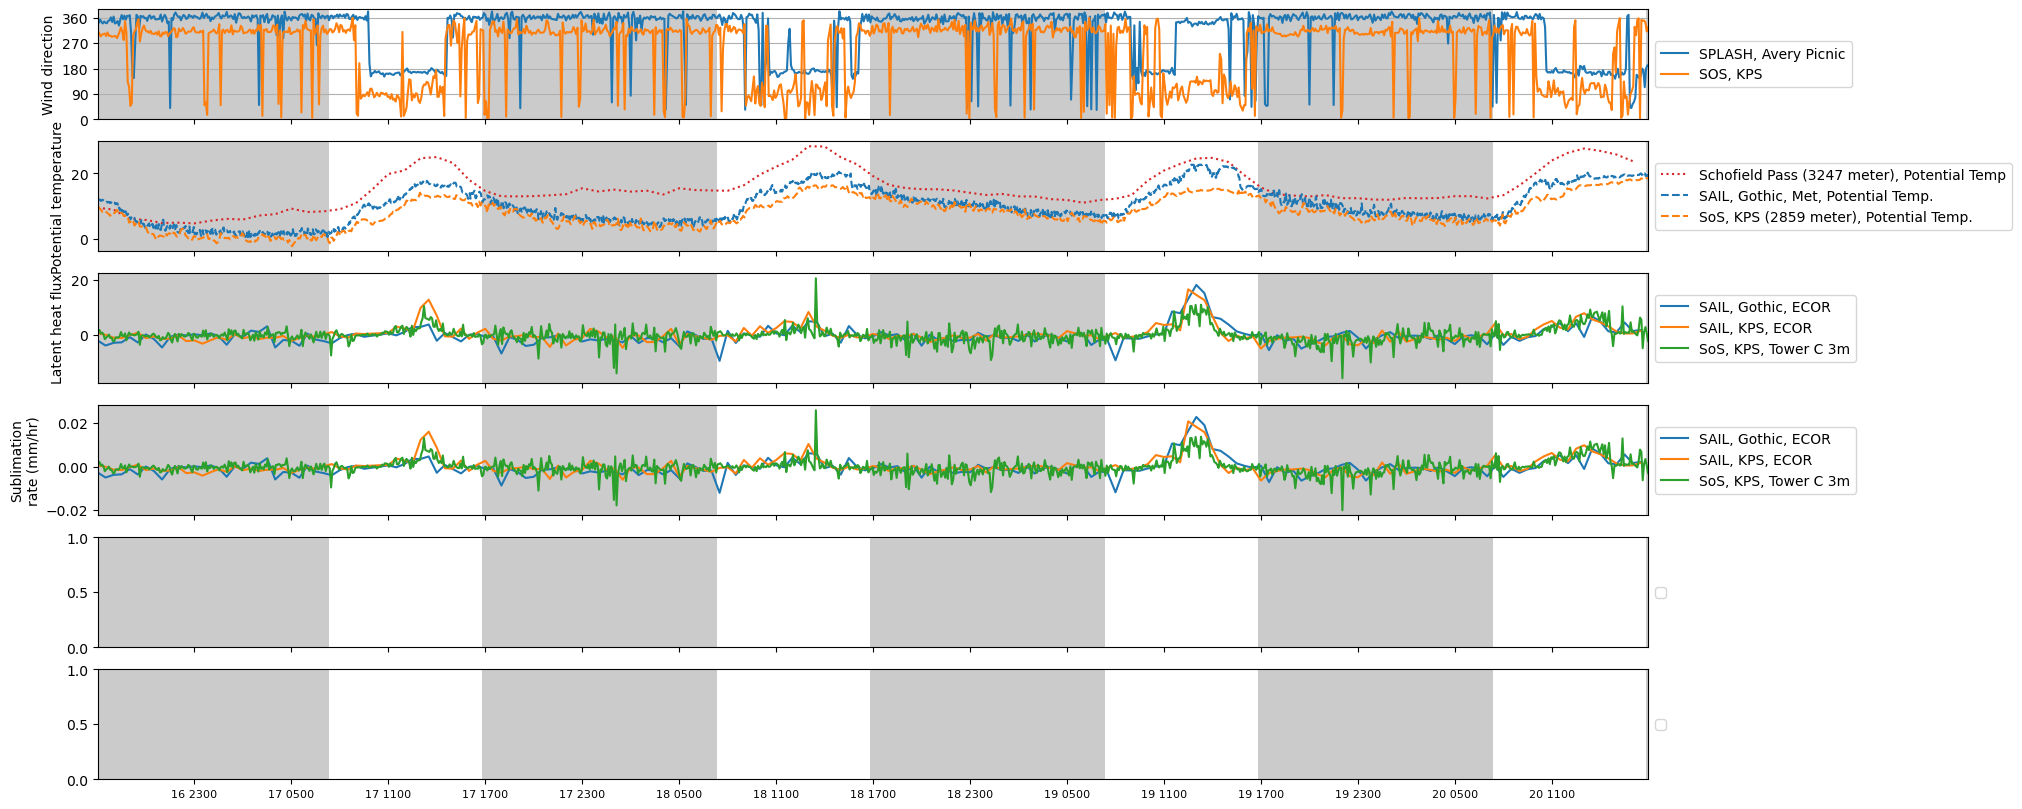

In [92]:
fig, axes = plt.subplots(6,1, figsize=(20,10), sharex=True)

# plot
axes[0].plot(averypicnic_slowsled_xr_5min.local_time, averypicnic_slowsled_xr_5min['wdir_vec_mean'], label = "SPLASH, Avery Picnic")
# axes[0].plot(met_gothic_ds_5min.local_time, met_gothic_ds_5min['wdir_vec_mean'], label='SAIL, Gothic, Met', linewidth=0.75)
axes[0].plot(sos_ds.local_time, sos_ds['dir_3m_c'], label='SOS, KPS')
# axes[0].plot(pond_slowsled_xr.local_time, pond_slowsled_xr['wdir_vec_mean'], label = "SPLASH, KPS Annex")
# axes[0].plot(ecor_gothic_ds.local_time, ecor_gothic_ds['wind_dir'], label='SAIL, Gothic, ECOR')
# axes[0].plot(ecor_kps_ds.local_time, ecor_kps_ds['wind_dir'], label='SAIL, KPS, ECOR')
axes[0].set_ylabel('Wind direction')
axes[0].set_ylim(0, 390)
axes[0].set_yticks([0, 90, 180, 270, 360])
axes[0].yaxis.grid(True)

axes[1].plot(
    snotel_df.reset_index().datetime,
    snotel_df['potential temperature'],
    label=f"Schofield Pass ({schofield_elevation.astype('int')}), Potential Temp", 
    linestyle=':',
    color='tab:red'
)
axes[1].plot(met_gothic_ds.local_time, met_gothic_ds['potential temperature'], label='SAIL, Gothic, Met, Potential Temp.', linestyle='--', color='tab:blue')
axes[1].plot(sos_ds.local_time, sos_ds['Tpot_1m_c'], label=f"SoS, KPS ({kps_elevation.astype('int')}), Potential Temp.", linestyle='--', color='tab:orange')
# axes[1].plot(met_gothic_ds.local_time, met_gothic_ds['temp_mean'], label='SAIL, Gothic, Met, Temp.', color='tab:blue')
# axes[1].plot(sos_ds.local_time, sos_ds['T_1m_c'], label='SoS, KPS, Temp.', color='tab:orange')
axes[1].set_ylabel('Potential temperature')

axes[2].plot(ecor_gothic_ds.local_time, ecor_gothic_ds['lv_e'], label='SAIL, Gothic, ECOR')
axes[2].plot(ecor_kps_ds.local_time, ecor_kps_ds['lv_e'], label='SAIL, KPS, ECOR')
axes[2].plot(sos_ds.local_time, sos_ds['lv_e'], label='SoS, KPS, Tower C 3m')
axes[2].set_ylabel('Latent heat flux')

axes[3].plot(ecor_gothic_ds.local_time, ecor_gothic_ds['sublimation rate (mm/hr)'], label='SAIL, Gothic, ECOR')
axes[3].plot(ecor_kps_ds.local_time, ecor_kps_ds['sublimation rate (mm/hr)'], label='SAIL, KPS, ECOR')
axes[3].plot(sos_ds.local_time, sos_ds['sublimation rate (mm/hr)'], label='SoS, KPS, Tower C 3m')
axes[3].set_ylabel('Sublimation\nrate (mm/hr)')

for ax in axes:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))   #to get a tick every 4 hrs
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d %H00'))
    ax.xaxis.set_tick_params(labelsize=8)
    # ax.legend()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    for i,row in night_df.iterrows():
        ax.axvspan(row['sunset'], row['sunrise'], facecolor='0.2', alpha=0.25)
    ax.set_xlim(sos_ds.local_time.min().values, sos_ds.local_time.max().values)

## Potential temperature and wind profiles

In [93]:
# sos_tidy_temps = sos_ds[[f for f in sos_ds.data_vars if f.startswith('T_') or f.startswith('Tpot_')]]
sos_tidy_temps_ds = sos_ds[[f for f in sos_ds.data_vars if f.startswith('T_') or f.startswith('Tpot_') or f.startswith('spd_', ) or f.startswith('w_h2o__') or f.startswith('u_h2o__') or f.startswith('v_h2o__')]]
Tpo
sos_tidy_temps = sos_tidy_temps_ds.resample(time='360Min').mean().to_dataframe().reset_index()
sos_tidy_temps_1_hr = sos_tidy_temps_ds.resample(time='60Min').mean().to_dataframe().reset_index()

# Change the timezone ( the xarray dimensions were still in UTC)
sos_tidy_temps = sosutils.modify_df_timezone(sos_tidy_temps, 'UTC', 'US/Mountain')
sos_tidy_temps = sos_tidy_temps.melt(id_vars='time')
sos_tidy_temps['height'] = sos_tidy_temps['variable'].apply(sosutils.height_from_variable_name)
sos_tidy_temps['tower'] = sos_tidy_temps['variable'].apply(sosutils.tower_from_variable_name)
sos_tidy_temps['measurement'] = sos_tidy_temps['variable'].apply(sosutils.measurement_from_variable_name)

sos_tidy_temps_1_hr = sosutils.modify_df_timezone(sos_tidy_temps_1_hr, 'UTC', 'US/Mountain')
sos_tidy_temps_1_hr = sos_tidy_temps_1_hr.melt(id_vars='time')
sos_tidy_temps_1_hr['height'] = sos_tidy_temps_1_hr['variable'].apply(sosutils.height_from_variable_name)
sos_tidy_temps_1_hr['tower'] = sos_tidy_temps_1_hr['variable'].apply(sosutils.tower_from_variable_name)
sos_tidy_temps_1_hr['measurement'] = sos_tidy_temps_1_hr['variable'].apply(sosutils.measurement_from_variable_name)


In [94]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [95]:
alt.Chart(sos_tidy_temps).transform_filter(
    alt.datum.measurement == 'wind speed'
).mark_line().encode(
    alt.X('value:Q', sort='-y', title=None),
    alt.Y('height:Q'),
    alt.Facet('time:T', header=alt.Header(format="%m/%d %H:00", formatType='time'), title='Wind Speed (m/s)')
).properties(
    width=50, 
    height=100
).resolve_scale(
    x='independent'
).configure_header(
    titleOrient='bottom'
)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [96]:
alt.Chart(sos_tidy_temps).transform_filter(
    alt.datum.measurement == 'potential temperature'
).mark_line().encode(
    alt.X('value:Q', sort='-y', title=None),
    alt.Y('height:Q'),
    alt.Facet('time:T', header=alt.Header(format="%m/%d %H:00", formatType='time'), title='Potential Temperature (˚C)')
).properties(
    width=50, 
    height=100
).resolve_scale(
    x='independent'
).configure_header(
    titleOrient='bottom'
)

alt.Chart(...)

In [97]:
sos_tidy_temps.loc[sos_tidy_temps.measurement == 'u_h2o_', 'value'] = sos_tidy_temps.loc[sos_tidy_temps.measurement == 'u_h2o_']['value']*1000
sos_tidy_temps.loc[sos_tidy_temps.measurement == 'v_h2o_', 'value'] = sos_tidy_temps.loc[sos_tidy_temps.measurement == 'v_h2o_']['value']*1000
sos_tidy_temps.loc[sos_tidy_temps.measurement == 'w_h2o_', 'value'] = sos_tidy_temps.loc[sos_tidy_temps.measurement == 'w_h2o_']['value']*1000



In [98]:
sos_ds['w_h2o__1m_c']

<xarray.DataArray 'w_h2o__1m_c' (time: 1152)>
array([ 1.6178838e-04,  4.1911082e-04,  4.3790892e-04, ...,
        3.2692496e-05, -3.4967896e-05, -3.9133086e-04], dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 2022-12-17T00:02:30 ... 2022-12-20T23:5...
    local_time  (time) datetime64[ns] 2022-12-16T17:02:30 ... 2022-12-20T16:5...
Attributes:
    long_name:   2nd moment
    short_name:  w'h2o'.1m.c
    units:       m/s g/m^3
    counts:      counts_1m_c_1

In [99]:
alt.Chart(sos_tidy_temps).transform_filter(
    alt.datum.measurement == 'w_h2o_'
).mark_line().encode(
    alt.X('value:Q', sort='-y', title=None),
    alt.Y('height:Q'),
    alt.Facet('time:T', header=alt.Header(format="%m/%d %H:00", formatType='time'), title='Vertical moisture flux (m/s * mg/m^3)')
).properties(
    width=50, 
    height=100
).resolve_scale(
    x='independent'
).configure_header(
    titleOrient='bottom'
)

alt.Chart(...)

## Detailed hourly wind profiles for one day

In [100]:
sos_tidy_temps_1_hr['day_hour'] = sos_tidy_temps_1_hr['time'].dt.strftime('%D %H')
sos_tidy_temps_1_hr['day'] = sos_tidy_temps_1_hr['time'].dt.day
sos_tidy_temps_1_hr['hour'] = sos_tidy_temps_1_hr['time'].dt.hour
sos_tidy_temps_1_hr['minute'] = sos_tidy_temps_1_hr['time'].dt.minute
sos_tidy_temps_1_hr['hour_group'] = pd.cut(
    sos_tidy_temps_1_hr['hour'],
    [-1, 6, 11, 18, 24],
    labels=['0-6', '6-12', '12-18', '18-24']
)

In [101]:
alt.Chart(sos_tidy_temps_1_hr).transform_filter(
    alt.datum.day == 17
).transform_filter(
    alt.datum.measurement == 'wind speed'
).mark_line().encode(
    alt.X('value:Q', sort='-y'),
    alt.Y('height:Q'),
    alt.Color("hour:O", scale=alt.Scale(scheme='turbo')),
    alt.Facet("hour_group:O", sort=['0-6', '6-12', '12-18', '18-24'], columns=2)
).properties(width=300).resolve_scale(
    color='independent', 
    x='independent'
)

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

# Rotate coordinate system for limited time period

In [102]:
tidy_df = sosutils.get_tidy_dataset(sos_ds, VARIABLE_NAMES)
# Change the timezone ( the xarray dimensions were still in UTC)
tidy_df = sosutils.modify_df_timezone(tidy_df, 'UTC', 'US/Mountain')

# NIGHTIME DOWNVALLEY WIND
# tidy_df = tidy_df[
#     (tidy_df.time > datetime.datetime(2022, 12, 18, 0)) &
#     (tidy_df.time < datetime.datetime(2022, 12, 18, 2))
# ]

# DAYTIME UPVALLEY WIND
tidy_df = tidy_df[
    (tidy_df.time > datetime.datetime(2022, 12, 18, 13)) &
    (tidy_df.time < datetime.datetime(2022, 12, 18, 15))
]

In [103]:
tidy_streamwise_df = sosutils.streamwise_coordinates_single_rotation_tidy_df(tidy_df)

### Look at changes to vector variables

In [104]:

alt.Chart(
    pd.concat([
        tidy_df.assign(coordinates='Sonic'),
        tidy_streamwise_df.assign(coordinates='Streamwise')
    ])
).transform_filter(
    alt.FieldOneOfPredicate('height', [1,2,3,5,10,15,20]) # limite to measurements at sonic heights
).transform_filter(
    alt.FieldOneOfPredicate('measurement', [
        'u','v','u_w_','v_w_','u_tc_','v_tc_','u_h2o_','v_h2o_',
    ]) # limit to measurements at sonic heights
).mark_line().encode(
    alt.X('time:T'),
    alt.Y('value:Q'),
    alt.Color('coordinates:N')
).properties(
    width=150,
    height=50
).facet(
    column = 'height:O',
    row = 'measurement'
).resolve_scale(y='independent')

/home/elilouis/mambaforge/envs/arm/lib/python3.11/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.FacetChart(...)

# Calculate nondimensional numbers

## **Obhukov Length**

$$ L = \frac{
  u_*^3 \overline{\theta_v}
}{
  k g \overline{w'\theta'_v}
}
$$

$u_*$ = local scale/shear velocity

$\overline{\theta_v} $ = virtual potential temperature (mean over reynolds-averaging period)

$ \overline{w'\theta'_v} $ = vertical turbulent flux of sensible heat (in terms of virtual potential temperature, mean over reynolds-averaging period)

$k$ = von kármán constant

$$ u_* = \sqrt{\frac{\overline{u'w'}}{\rho}} $$


$\overline{u'w'}$ = vertical turbulent flux of momentum (mean over reynolds-averaging period)

$\rho$ = air density

To calculate the shear velocity we need to rotate the coordinate system to point upstream.

In [105]:
import metpy.constants
import metpy.calc
from metpy.units import units
import pint

In [106]:
TOWER = 'c'
HEIGHT = 3

PRESSURE_TOWER = 'c'
PRESSURE_HEIGHT = 10

# Note that I need to use xarray datasets here for metpy/pint units and metpy functions work 
tidy_streamwise_indexed_df = tidy_streamwise_df.set_index(['time', 'tower', 'height', 'measurement',])

# We have pressure and temperature
pressure = xr.DataArray(tidy_streamwise_indexed_df.loc[:, PRESSURE_TOWER, PRESSURE_HEIGHT, 'pressure']['value']) * units.millibar
temperature = xr.DataArray(tidy_streamwise_indexed_df.loc[:, TOWER, HEIGHT, 'temperature']['value']) * units.celsius

# We need mixing ratio to calculate air density, which we can calculate with P, T, and Relative Humidity
#   see: http://www.atmo.arizona.edu/students/courselinks/fall12/atmo336/lectures/sec1/humidity.html
# Note: we need to convert RH to a fraction as it comes in percent units (ie .7 is 70.)
mixing_ratio = xr.DataArray(tidy_streamwise_indexed_df.loc[:, TOWER, HEIGHT, 'RH']['value']/100) * metpy.calc.saturation_mixing_ratio(
    pressure,
    temperature
)
air_density = metpy.calc.density(pressure, temperature, mixing_ratio)

# Now calculate shear velocity
vertical_turb_momentum_flux = xr.DataArray(tidy_streamwise_indexed_df.loc[:, TOWER, HEIGHT, 'u_w_']['value']) * units('m/s') * units('m/s')
shear_velocity = ((vertical_turb_momentum_flux)**2)**(1/4)

virtual_temperature = xr.DataArray(tidy_streamwise_indexed_df.loc[:, TOWER, HEIGHT, 'virtual temperature']['value']) * units.celsius
vertical_velocity_virtual_temperature_covariance = xr.DataArray(tidy_streamwise_indexed_df.loc[:, TOWER, HEIGHT, 'w_tc_']['value']) * units('m/s') * units.celsius

virtual_potential_temperature = metpy.calc.potential_temperature(
    pressure,
    virtual_temperature
)

vertical_velocity_virtual_potential_temperature_covariance = metpy.calc.potential_temperature(
    pressure,
    vertical_velocity_virtual_temperature_covariance / units('m/s')
) * units('m/s')

k = 0.4
g = metpy.constants.earth_gravity

$ L = \frac{
  u_*^3 \overline{\theta_v}
}{
  k g \overline{w'\theta'_v}
}
$

$ u_* = ((\overline{u'w'})^2)^{1/4}$


In [107]:
obukhov_length = - (shear_velocity**3)*virtual_potential_temperature/(k*g*vertical_velocity_virtual_potential_temperature_covariance)

In [108]:
print("Obukhov length, mean of the time series of calculated lengths")
print(obukhov_length.mean())

Obukhov length, mean of the time series of calculated lengths
<xarray.DataArray ()>
<Quantity(-0.1648704558610916, 'meter')>


In [109]:
virtual_potential_temperature

<xarray.DataArray (time: 24)>
<Quantity([289.51797 289.78622 290.02872 290.36865 290.48917 290.2696  289.64804
 289.26724 289.37057 289.46356 289.6595  289.8167  289.9024  289.8533
 290.02548 289.94543 290.0409  290.2068  290.1482  289.8443  289.84662
 290.50693 289.99454 290.18497], 'kelvin')>
Coordinates:
  * time     (time) datetime64[ns] 2022-12-18T13:02:30 ... 2022-12-18T14:57:30

In [110]:
print("Obukhov length, calculated from mean inputs")
print(
    - (shear_velocity.mean()**3)*virtual_potential_temperature.mean()/ \
        (k*g*vertical_velocity_virtual_potential_temperature_covariance.mean())
)

Obukhov length, calculated from mean inputs
<xarray.DataArray ()>
<Quantity(-0.02057389694826078, 'meter')>


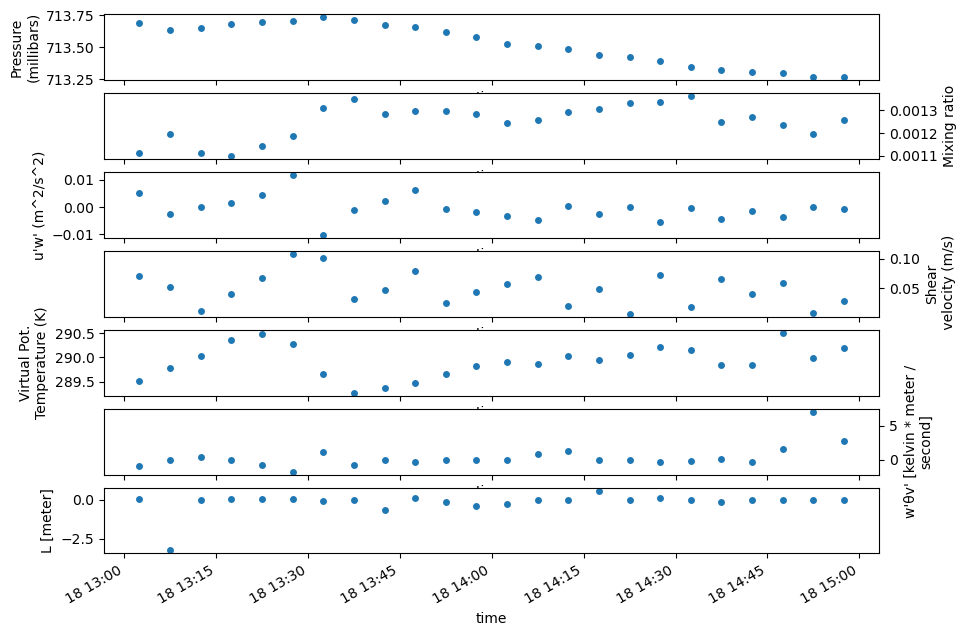

In [111]:

fig, axes = plt.subplots(7,1, figsize=(10,7), sharex=True)

pressure.name = 'Pressure'
pressure.plot.scatter(ax=axes[0])
axes[0].set_ylabel("Pressure\n(millibars)")

mixing_ratio.name = 'Mixing ratio'
mixing_ratio.plot.scatter(ax=axes[1])
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_ylabel("Mixing ratio")

vertical_turb_momentum_flux.name = "u'w'"
vertical_turb_momentum_flux.plot.scatter(ax=axes[2])
axes[2].set_ylabel("u'w' (m^2/s^2)")

shear_velocity.name = 'Shear velocity'
shear_velocity.plot.scatter(ax=axes[3])
axes[3].yaxis.set_label_position("right")
axes[3].yaxis.tick_right()
axes[3].set_ylabel("Shear\n velocity (m/s)")


virtual_potential_temperature.name = 'Virtual Pot. Temp'
virtual_potential_temperature.plot.scatter(ax=axes[4])
axes[4].set_ylabel("Virtual Pot.\nTemperature (K)")

vertical_velocity_virtual_potential_temperature_covariance.name = r"w'θv'"
vertical_velocity_virtual_potential_temperature_covariance.plot.scatter(ax=axes[5])
axes[5].yaxis.set_label_position("right")
axes[5].yaxis.tick_right()
axes[5].set_label("w'θv'\n(K m/s)")


obukhov_length.name = 'L'
obukhov_length.plot.scatter(ax=axes[6])
# axes[6].set_ylim(-.2,.2)
axes[6].set_label("L (m)")

# for ax in axes:
#     ax.yaxis.label.set_fontsize(8)

# Apply M.O.S.T. Models

Holtslag and de Bruin (1988) 

$$ \Phi_m (z/L) = 1 + 0.7(z/L) + 0.75(z/L)(6 - 0.35(z/L))exp(-0.35(z/L))$$

$$ \frac{d\overline{u}}{dz} = \frac{u_*}{k z} \Phi_m(z/L) $$

$$ \overline{u} = \int \frac{u_*}{k z} \Phi (z/L) dz $$

Using wolfram to integrate the above (treating $u_*$ and  $k$ as constants),

$$ \overline{u} = (u_*/k)(1/L)(e^{-0.35 z/L}(0.75 z - 10.7143L)) + (1/L)0.7z + log(z)$$ 

In [112]:
def profile_function(z, L, shear_velocity):
    k = 0.4
    return (shear_velocity/k)*(1/L)*(np.exp(-0.35*z/L)*(0.75*z - 10.7143*L)) + (1/L)*0.7*z + np.log(z)

In [113]:
mean_obukhov_length = obukhov_length.mean().values.item()
mean_shear_velocity = shear_velocity.mean().values.item()

mean_obukhov_length, mean_shear_velocity

(-0.1648704558610916, 0.048870742321014404)

In [114]:
profile_comparison_df = tidy_streamwise_indexed_df.groupby(['tower', 'height', 'measurement']).mean().loc['c', :, 'u'].reset_index()

/tmp/ipykernel_391926/2955715082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profile_comparison_df = tidy_streamwise_indexed_df.groupby(['tower', 'height', 'measurement']).mean().loc['c', :, 'u'].reset_index()


In [115]:
profile_comparison_df['value_model'] = profile_comparison_df['height'].apply(lambda height: profile_function(height, mean_obukhov_length, mean_shear_velocity))

In [116]:
profile_comparison_df

height     value   value_model
0       1  0.274014 -1.982666e+01
1       2  0.260341 -1.767779e+02
2       3  0.198651 -1.747658e+03
3       5  0.169550 -1.664683e+05
4      10  0.190446 -1.138429e+10
5      15  0.167136 -6.511151e+14
6      20  0.208723 -3.414908e+19

<AxesSubplot: xlabel='value_model'>

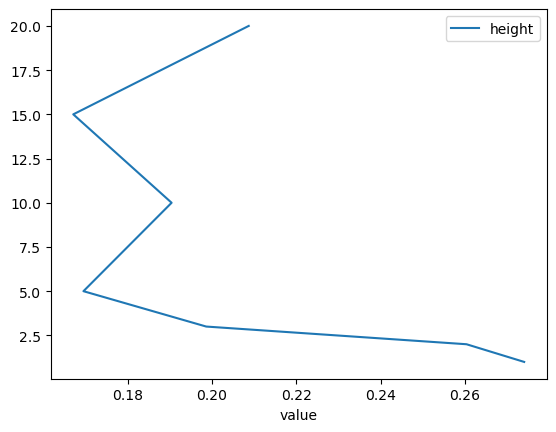

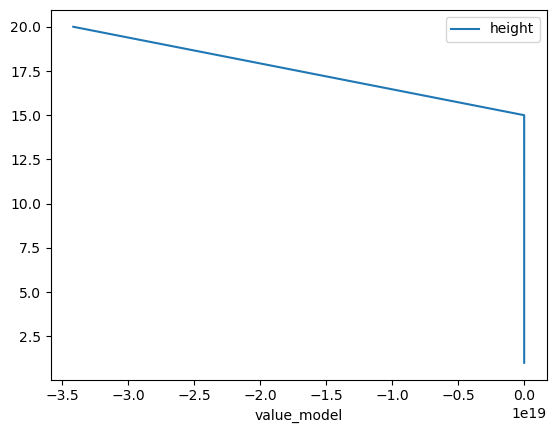

In [117]:
profile_comparison_df.plot('value', 'height')
profile_comparison_df.plot('value_model', 'height')

# Use Lapo's python tool for M.O.S.T.